<a href="https://colab.research.google.com/github/Ojz31/fraud-detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [58]:
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [59]:
df.shape

(4370166, 11)

In [60]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370166 entries, 0 to 4370165
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 366.8+ MB


In [62]:
df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value = [1,2,3,4,5],inplace =True)

<ipython-input-62-18936f766ed7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value = [1,2,3,4,5],inplace =True)


In [63]:
df['nameOrig']

,nameOrig
0,C1231006815
1,C1666544295
2,C1305486145
3,C840083671
4,C2048537720
...,...
4370161,C1583063307
4370162,C295643926
4370163,C1148424192
4370164,C72042785


In [64]:
df['nameOrig'].nunique()

4365732

In [65]:
df['nameDest'].nunique()

1863921

In [66]:
df.dropna(inplace=True)

In [67]:
null = df.isnull().sum()
null

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


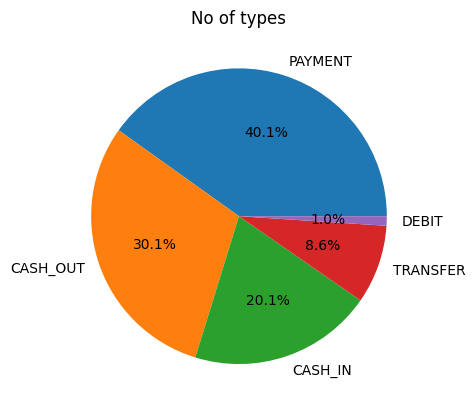

In [21]:
type_count = df['type'].value_counts()

plt.figure()
plt.pie(type_count,labels= type_count.index,autopct='%1.1f%%')
plt.title("No of types")
plt.show()

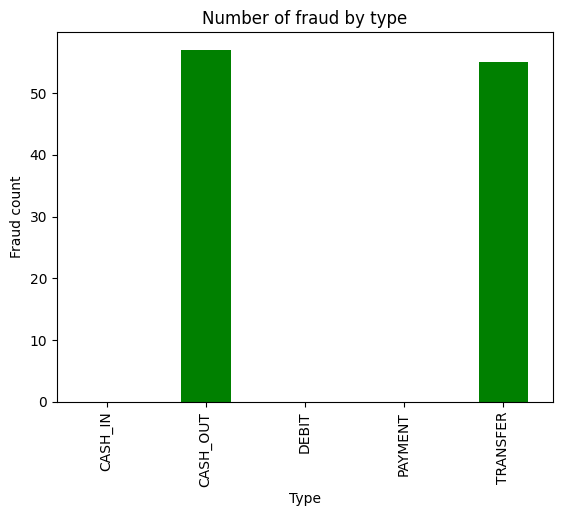

In [24]:
type_fraud = df.groupby('type')['isFraud'].sum()

plt.figure()
type_fraud.plot(kind='bar',color ='green')
plt.xlabel("Type")
plt.ylabel("Fraud count")
plt.title("Number of fraud by type")
plt.show()

In [68]:
df.drop(['nameOrig','nameDest'],axis =1,inplace=True)

In [69]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=42)

In [71]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
y_pred = log_reg.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9992895005108503
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    873350
         1.0       0.56      0.41      0.48       683

    accuracy                           1.00    874033
   macro avg       0.78      0.71      0.74    874033
weighted avg       1.00      1.00      1.00    874033

